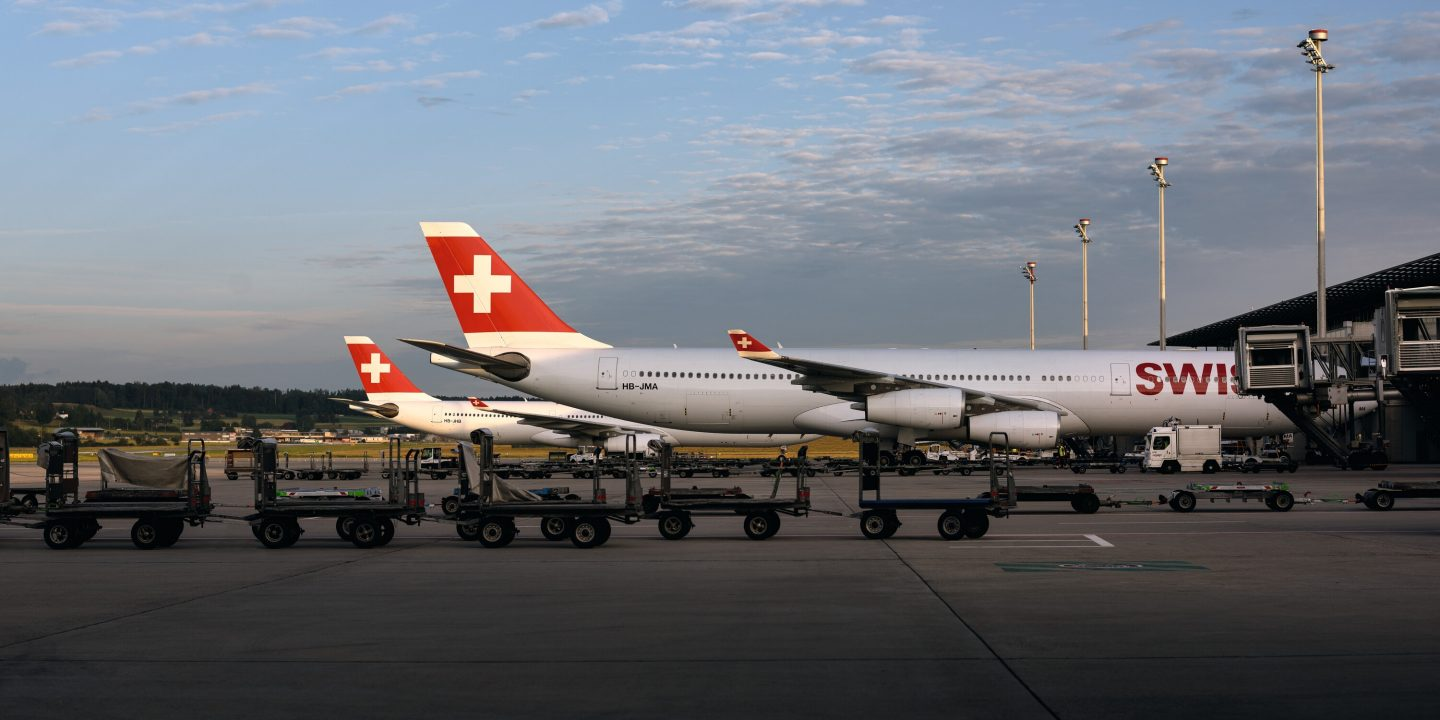

In [28]:
from transformers import pipeline
from PIL import Image
import requests

image_path = "../data/example_airport.jpg"
image = Image.open(image_path)

image

In [29]:
# Install the required package

instance_segmentation = pipeline("image-segmentation", model="facebook/detr-resnet-50-panoptic")

# Perform instance segmentation on the image
result = instance_segmentation(image)

# Display the result
result

Some weights of the model checkpoint at facebook/detr-resnet-50-panoptic were not used when initializing DetrForSegmentation: ['detr.model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForSegmentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForSegmentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.954472,
  'label': 'airplane',
  'mask': <PIL.Image.Image image mode=L size=1440x720>},
 {'score': 0.999801,
  'label': 'LABEL_187',
  'mask': <PIL.Image.Image image mode=L size=1440x720>},
 {'score': 0.93834,
  'label': 'road',
  'mask': <PIL.Image.Image image mode=L size=1440x720>},
 {'score': 0.987334,
  'label': 'LABEL_184',
  'mask': <PIL.Image.Image image mode=L size=1440x720>},
 {'score': 0.996172,
  'label': 'airplane',
  'mask': <PIL.Image.Image image mode=L size=1440x720>},
 {'score': 0.953669,
  'label': 'roof',
  'mask': <PIL.Image.Image image mode=L size=1440x720>},
 {'score': 0.99436,
  'label': 'truck',
  'mask': <PIL.Image.Image image mode=L size=1440x720>}]

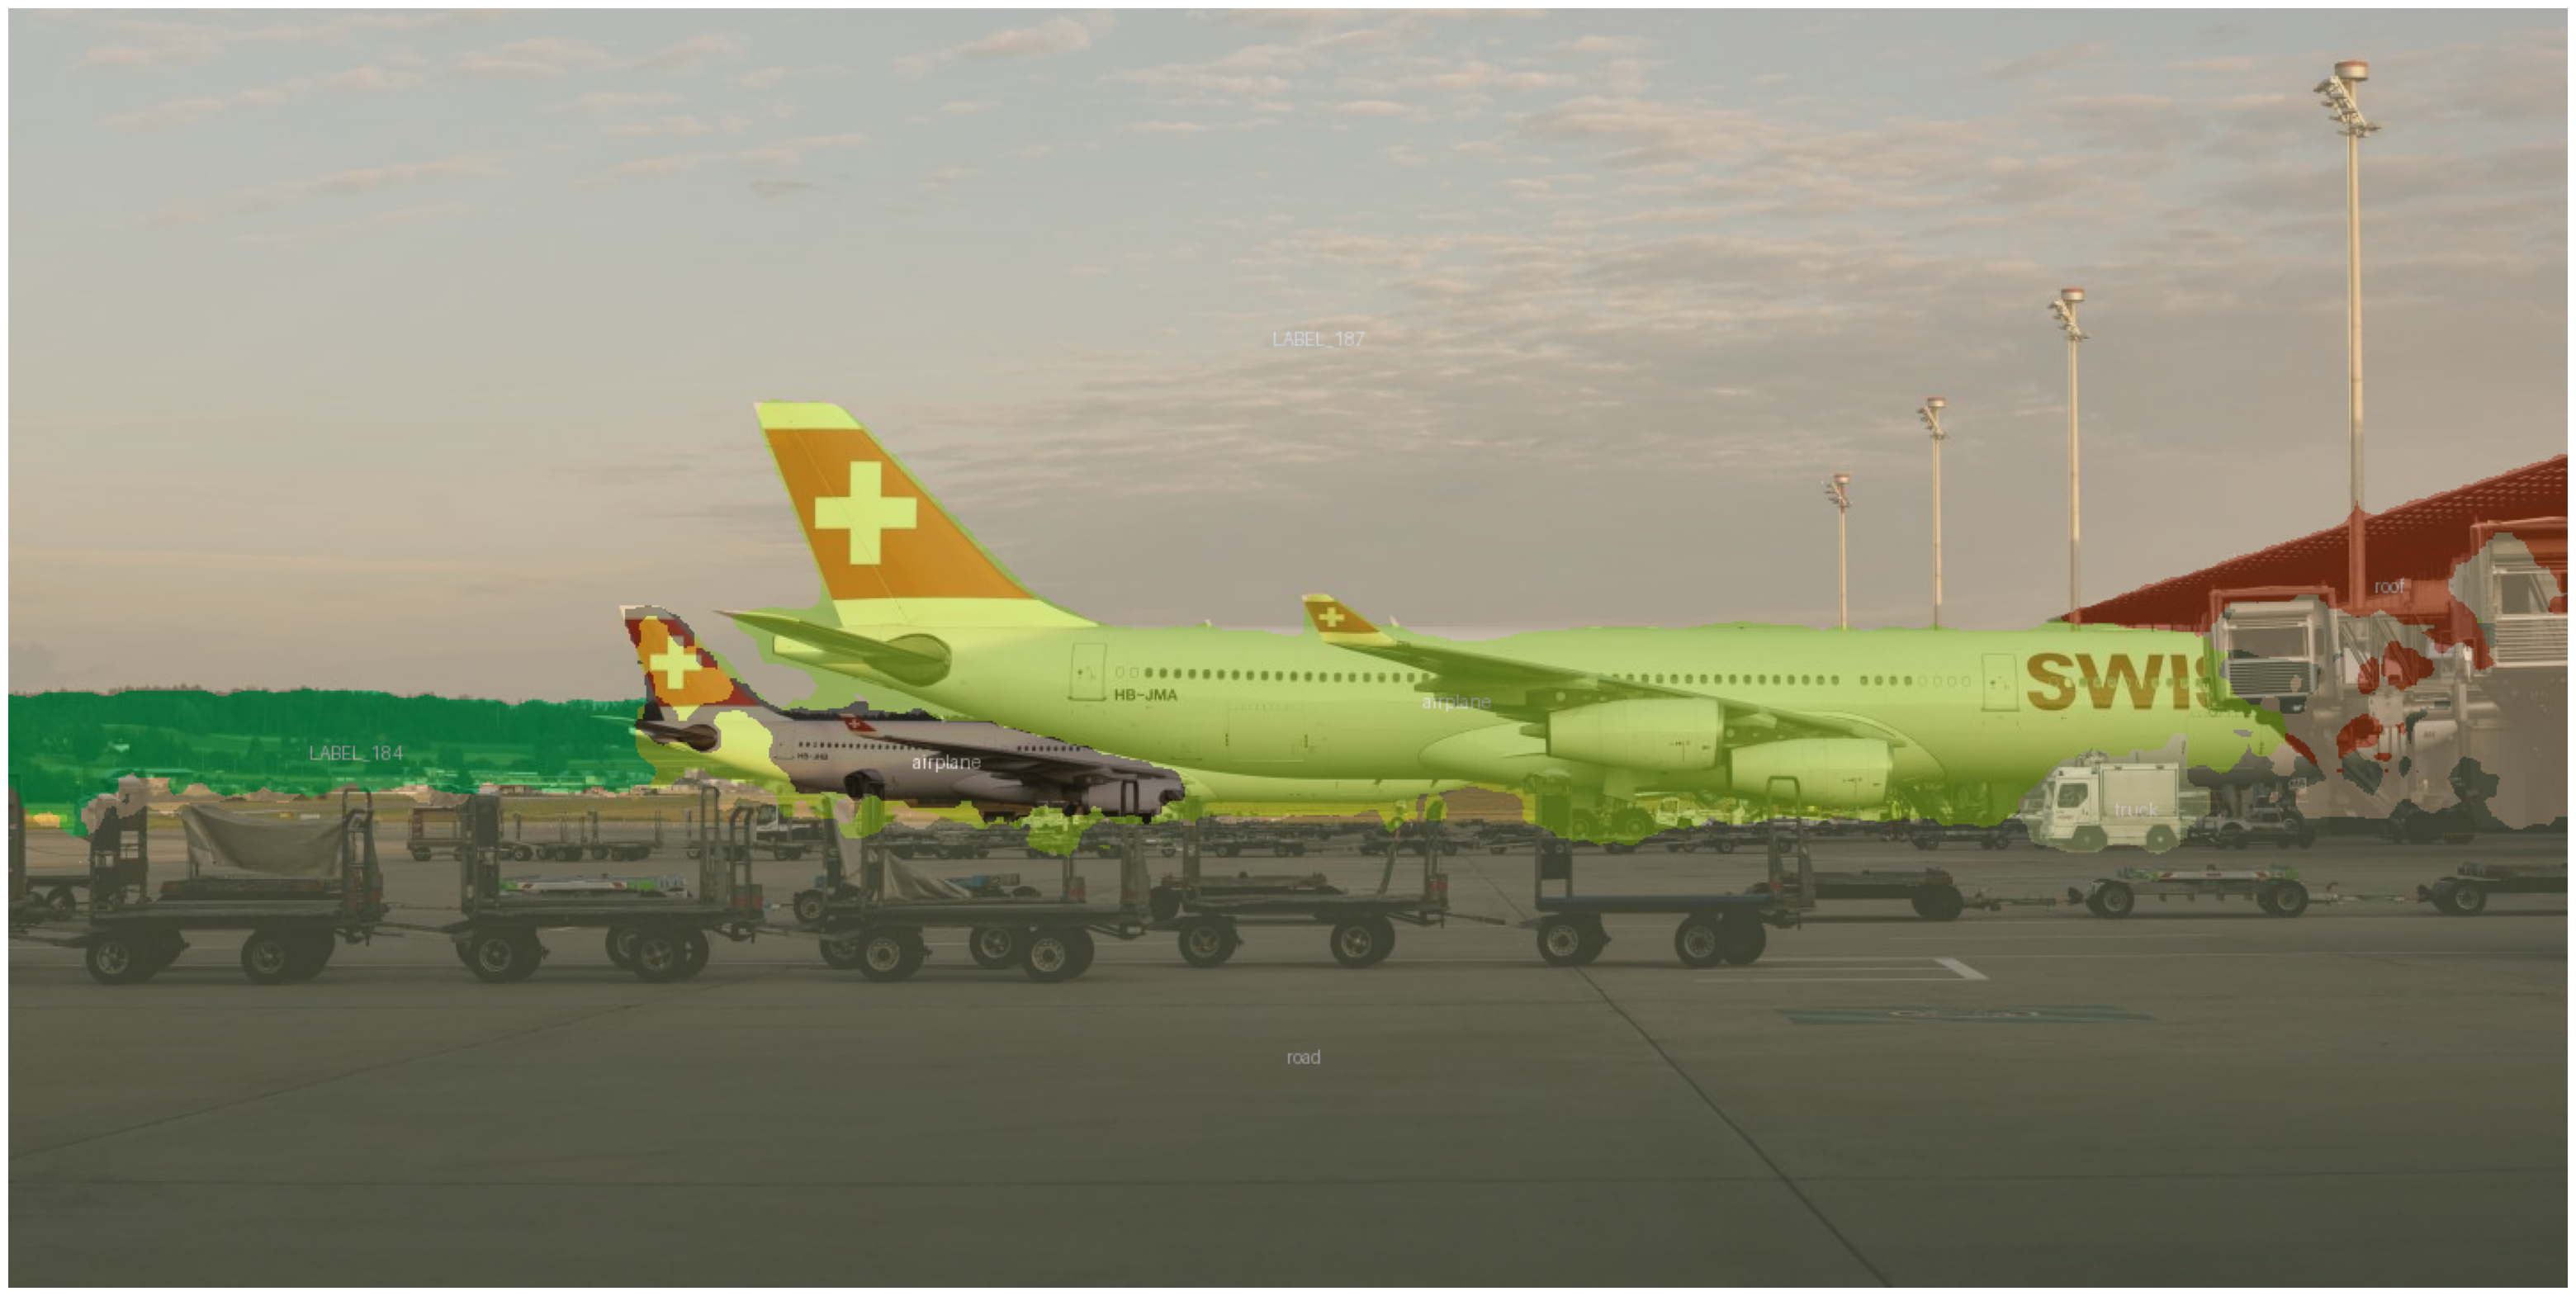

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw, ImageFont
from transformers import pipeline


# Create a new image to store the masks
segmented_image = image.copy()
draw = ImageDraw.Draw(segmented_image)

# Define a function to generate random colors
def random_color():
    return tuple(np.random.randint(0, 255, size=3).tolist())

# Define a helper function to calculate the centroid of a mask
def calculate_centroid(mask):
    indices = np.argwhere(mask)
    y, x = indices.mean(axis=0).astype(int)
    return x, y

font = ImageFont.load_default()

# Loop through the results and draw each segment with a random color and label
for segment in result:
    mask = np.array(segment['mask'])
    color = random_color()
    label = segment['label']

    # Overlay the mask with a random color
    for y in range(mask.shape[0]):
        for x in range(mask.shape[1]):
            if mask[y, x]:
                segmented_image.putpixel((x, y), color)

    # Calculate the centroid of the segment
    centroid_x, centroid_y = calculate_centroid(mask)

    # Draw the label at the centroid
    draw.text((centroid_x, centroid_y), label, fill=(255, 255, 255))

blended_image = Image.blend(image.convert("RGBA"), segmented_image.convert("RGBA"), alpha=0.5)

# Display the segmented image only
plt.figure(figsize=(40, 40))
plt.imshow(blended_image)
#plt.title('Segmented Image with Labels and Original Image Underneath')
plt.axis('off')  # Hide axes
plt.show()
